**<span style="color:gray"> <font size="5">수통컴 과제 _ LINEAR MODEL 구현 및 통계량 계산 , 변수별 중요도 파악</span> </font>**

보고서 작성시 
0. 데이터 형태 파악 --> 변수별 히스토그램, 변수별 income과의 관계로 확인함 

1. 데이터 전처리

    . 결측치 확인            --> isnull.. 없다. 
    
    . 이상치, 극단치 제거     --> income value를 기준으로 // 연소득이 0이하는 이상치라 간주하고 제거  income value를 기준으로 // 연소득이 0이하는 이상치라 간주하고 제거 
    
    . 변수별 정규화           --> 변수별로 측정 단위가 모두 다르기 때문에, 수치의 차이가 크게 작용한다 --> 이는 모델학습시, 편향된 결과나 크게 중요하지 않은 factor들이 모델을 민감하게 할 수 있다.
    
 
2. numpy만을 활용한 linear regression 구현

   linear regression을 구현하기 위해서 필요한 수식 정리 [, 메트릭스폼 변환 , 계산 함수식 구현, 메트릭스폼 변환 , 계산 함수식 구현등 ]
   
       회귀계수를 구하기위한 수식 정리
       
       t-value를 구하기위한 수식 정리
       
       t-value에 해당하는 p-value 구하기. 
       
       유의수준 0.05로 잡고, 해당 범위에서 허용가능한 회귀계수의 통계 추정량 구하기 
       
       r2구하기 
   
3. 최종 모델 회귀식 도출  계수별 해석  

       모델에 x변수들을 넣고 예측한 y_predict와 
       
       실제 y_true 값의 분포 보여주기. 
       


# 추가 참고 
---------------------------------------------------------------------------------------

자유도별 t분포 --> 계수 t-value의 위치 확인, 유의수준 0.05안에 존재하는지 

유의수준을 벗어나는 유의하지 않는 변수 빼서 회귀식 만들기?

정규화 전처리를 하지 않았을때와 했을대의 계수 비교

# **0. DATA 형태 파악**

## DATA set

In [252]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [626]:
data = pd.read_csv('test.csv')

In [627]:
data.drop(columns ='id',inplace=True)

In [628]:
new_columns = [ '키', '몸무게', '성적' , '성별(여:1)' , '석사졸업여부' , 'DS_학부졸업유무', '근무경력','수입']

In [629]:
data.columns = new_columns

In [630]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   키          3000 non-null   float64
 1   몸무게        3000 non-null   float64
 2   성적         3000 non-null   float64
 3   성별(여:1)    3000 non-null   int64  
 4   석사졸업여부     3000 non-null   int64  
 5   DS_학부졸업유무  3000 non-null   int64  
 6   근무경력       3000 non-null   int64  
 7   수입         3000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 187.6 KB


In [631]:
data.head(3)

,키,몸무게,성적,성별(여:1),석사졸업여부,DS_학부졸업유무,근무경력,수입
0,178.400,56.900,3.190,0,0,1,7,3043
1,169.600,70.800,2.520,0,0,1,13,907
2,163.500,64.700,3.180,1,0,1,12,1592


In [632]:
pd.DataFrame(data.isnull().sum(),columns=['결측치'])

,결측치
키,0
몸무게,0
성적,0
성별(여:1),0
석사졸업여부,0
DS_학부졸업유무,0
근무경력,0
수입,0


## DATA Trend

# **1. 데이터 전처리**

### 독립변수 vs y(income) 간의 산점도 TREND 파악 

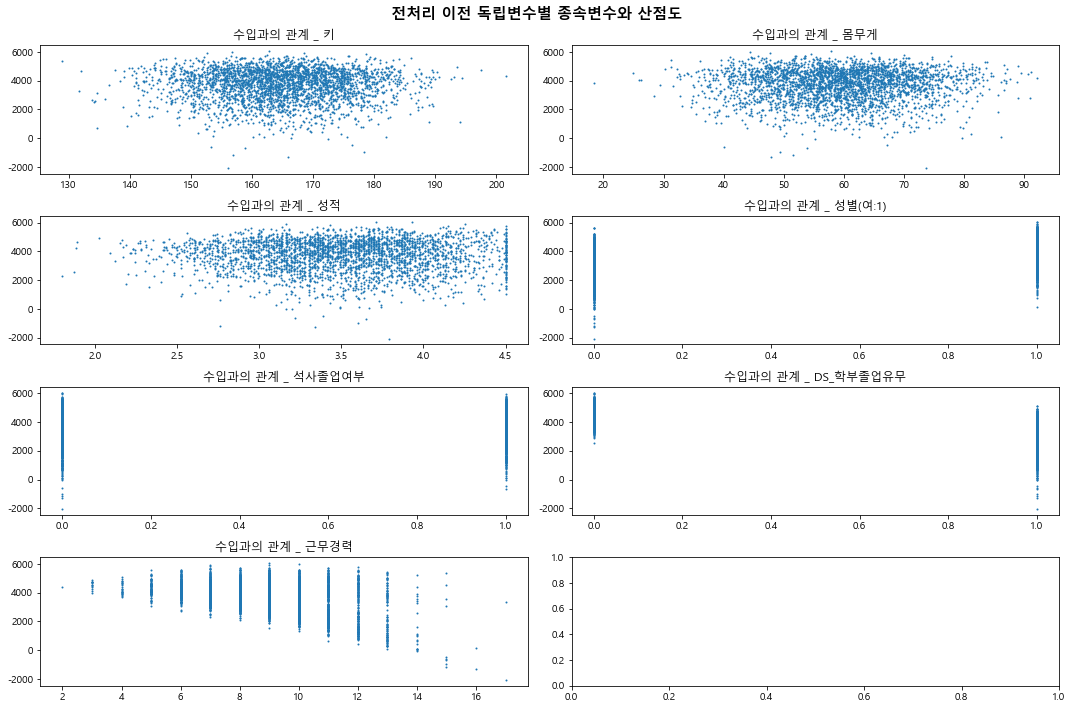

In [634]:
import platform
if platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 
%matplotlib inline

fig, axes = plt.subplots(4,2)

fig.set_size_inches((15,10))
fig.suptitle(" 전처리 이전 독립변수별 종속변수와 산점도 " , fontsize=15 , weight ='bold')
plt.subplots_adjust(wspace = 0.3, hspace=0.3) 

columns = data.columns[:-1]
for i in range(7) : 
    axes[i//2,i%2].scatter(data[columns[i]],data['수입'],s =1)
    axes[i//2,i%2].set_title("수입과의 관계 _ "+ columns[i], fontsize=12)
    
plt.tight_layout()    
plt.show()

### 독립변수별 값 분포 TREND 파악 _ HISTOGRAM

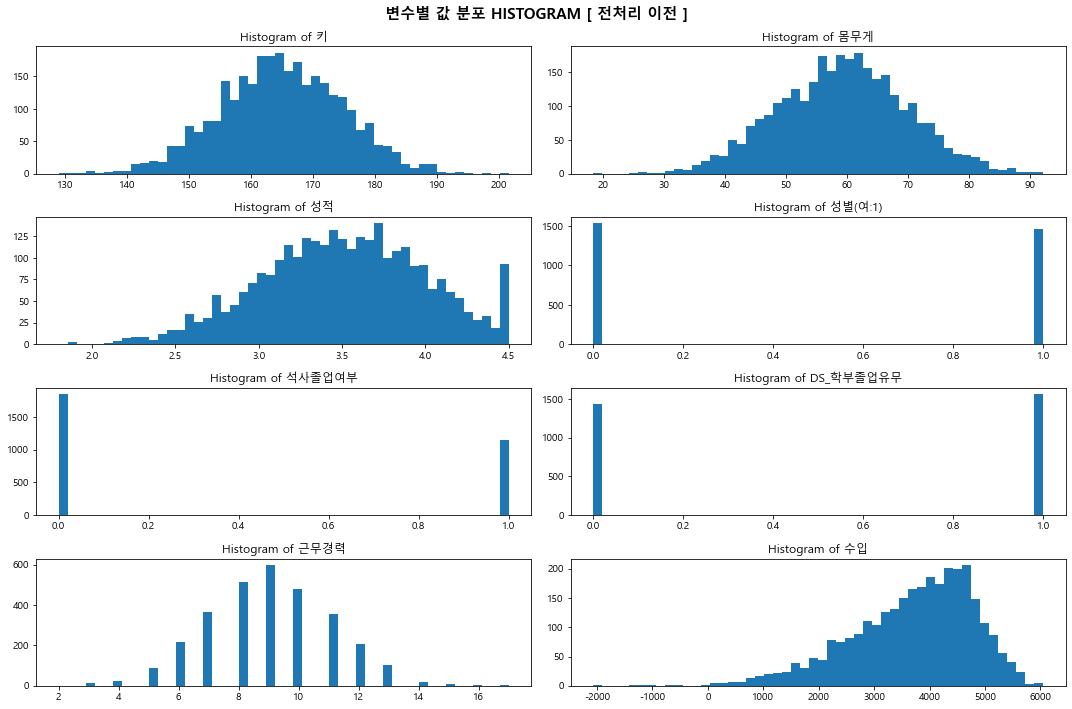

In [438]:
fig, axes = plt.subplots(4,2)

fig.set_size_inches((15,10))
fig.suptitle(" 변수별 값 분포 HISTOGRAM [ 전처리 이전 ] " , fontsize=15 , weight ='bold')
plt.subplots_adjust(wspace = 0.3, hspace=0.3) 

columns = data.columns
for i in range(8) : 
    axes[i//2,i%2].hist(data[columns[i]],bins=50)
    axes[i//2,i%2].set_title("Histogram of "+ columns[i], fontsize=12)
    
plt.tight_layout()    
plt.show()

## 이상치 제거 - 연봉에서 -값 제거

                수입
count  3000.000000
mean   3696.081000
std    1106.923582
min   -2068.000000
1%      716.520000
5%     1615.800000
10%    2181.800000
50%    3886.000000
90%    4937.100000
95%    5185.300000
99%    5558.050000
max    6050.000000


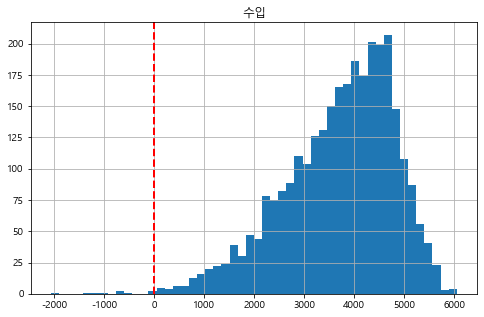

In [184]:
plt.rcParams["figure.figsize"] = (8,5)
data[['수입']].hist(bins=50)
plt.axvline(x=0 , color='r', linestyle='--', linewidth=2)
print(pd.DataFrame(data['수입'].describe(percentiles = [0.01,0.05,0.1,0.9,0.95,0.99])))

In [186]:
data['키'] = round(data['키'],1)
data['몸무게'] = round(data['몸무게'],1)

In [187]:
data[data['수입']<0]

,키,몸무게,성적,성별(여:1),석사졸업여부,DS_학부졸업유무,근무경력,수입
321,156.9,51.6,2.76,0,0,1,15,-1172
736,158.8,53.8,3.65,0,1,1,15,-688
1207,176.3,67.1,3.39,0,1,1,15,-476
1850,172.4,55.2,3.20,0,1,1,14,-45
2073,166.4,79.7,3.16,0,0,1,14,-6
2086,178.3,49.3,3.60,0,0,1,15,-982
2107,156.1,73.6,3.79,0,0,1,17,-2068
2487,153.3,40.0,3.22,0,0,1,15,-609
2874,165.9,47.8,3.34,0,0,1,16,-1284


In [639]:
# 1차 filtering 
## 연소득 0이상
data_filt = data[data['수입']>0]

In [640]:
print(data.shape)
print(data_filt.shape)

(3000, 8)
(2991, 8)


In [641]:

import warnings
warnings.filterwarnings('ignore')

## Standard [@numpy로 구현 ]

In [642]:
def min_max_normalization(series):
    x_max = series.max()
    x_min = series.min() 
    
    return round((series - x_min) / (x_max - x_min),2)

In [643]:
normalized_data = data_filt[['수입']]
for i in data_filt.columns[:-1] : 
    normalized_data[i] = min_max_normalization(data[i])

In [644]:
normalized_data = normalized_data[['키', '몸무게', '성적', '성별(여:1)', '석사졸업여부', 'DS_학부졸업유무', '근무경력','수입']]

In [645]:
data_filt.describe()

,키,몸무게,성적,성별(여:1),석사졸업여부,DS_학부졸업유무,근무경력,수입
count,"2,991.000","2,991.000","2,991.000","2,991.000","2,991.000","2,991.000","2,991.000","2,991.000"
mean,164.752,59.299,3.503,0.490,0.381,0.520,8.966,"3,709.653"
std,9.901,10.501,0.493,0.500,0.486,0.500,2.050,"1,080.009"
min,129.000,18.400,1.800,0.000,0.000,0.000,2.000,52.000
25%,158.100,52.000,3.160,0.000,0.000,0.000,8.000,"3,019.000"
50%,164.700,59.500,3.510,0.000,0.000,1.000,9.000,"3,888.000"
75%,171.600,66.300,3.860,1.000,1.000,1.000,10.000,"4,529.000"
max,201.500,92.100,4.500,1.000,1.000,1.000,17.000,"6,050.000"


In [646]:
normalized_data.describe()

,키,몸무게,성적,성별(여:1),석사졸업여부,DS_학부졸업유무,근무경력,수입
count,"2,991.000","2,991.000","2,991.000","2,991.000","2,991.000","2,991.000","2,991.000","2,991.000"
mean,0.493,0.555,0.631,0.490,0.381,0.520,0.464,"3,709.653"
std,0.137,0.142,0.183,0.500,0.486,0.500,0.137,"1,080.009"
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,52.000
25%,0.400,0.460,0.500,0.000,0.000,0.000,0.400,"3,019.000"
50%,0.490,0.560,0.630,0.000,0.000,1.000,0.470,"3,888.000"
75%,0.590,0.650,0.760,1.000,1.000,1.000,0.530,"4,529.000"
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,"6,050.000"


## after cleaning _ trend (scatter)

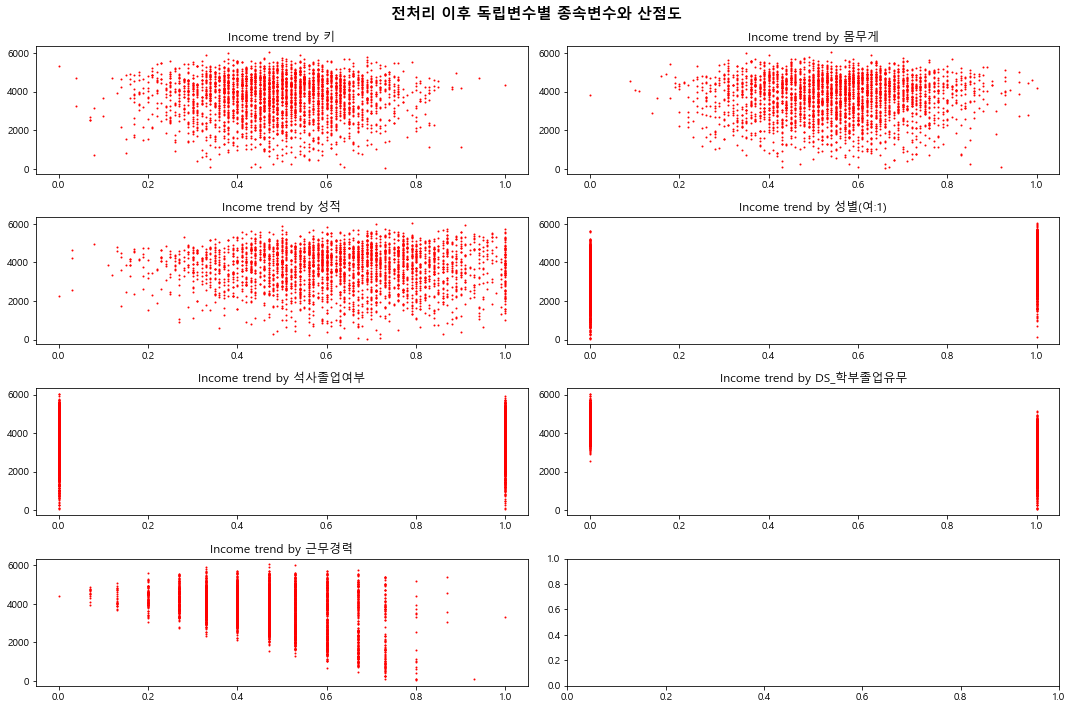

In [647]:
fig, axes = plt.subplots(4,2)

fig.set_size_inches((15,10))
fig.suptitle("전처리 이후 독립변수별 종속변수와 산점도" , fontsize=15 , weight ='bold')
plt.subplots_adjust(wspace = 0.3, hspace=0.3) 

for i in range(7) : 
    axes[i//2,i%2].scatter(normalized_data[columns[i]],normalized_data['수입'],s =1 , color = 'r')
    axes[i//2,i%2].set_title("Income trend by "+ columns[i], fontsize=12)
plt.tight_layout()    
plt.show()

             수입
count 2,991.000
mean  3,709.653
std   1,080.009
min      52.000
1%      802.500
5%    1,646.000
10%   2,198.000
50%   3,888.000
90%   4,938.000
95%   5,188.000
99%   5,558.500
max   6,050.000


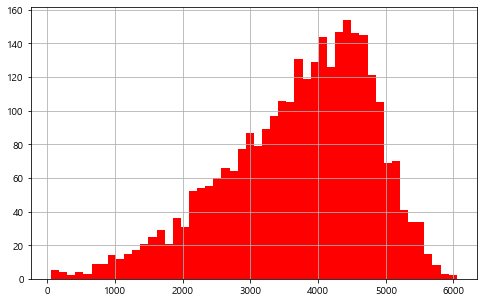

In [648]:
plt.rcParams["figure.figsize"] = (8,5)
normalized_data['수입'].hist(bins=50,color='r')
print(pd.DataFrame(normalized_data['수입'].describe(percentiles = [0.01,0.05,0.1,0.9,0.95,0.99])))

# **2. 선형회귀 모델식 구현**

##선형회귀를 위해 필요한 수식 정리


## <span style="color:blue"> <font size="3">**1. 각각의 회귀 계수 구하기 위해 필요한 공식** </span> </font>
## to calculate <span style="color:red"> <font size="3">'Betas'(=coefficient)</span> </font> , need to use the function of <span style="color:red"> <font size="3"> **" (X.T * X )inverse * X.T * Y "**</span> </font>


## <span style="color:blue"> <font size="3">**2. T값 구하기 위해 필요한 값 "( T = Beta/SE )" --> 계수별 잔차에 대한 표준오차(SE) & 회귀식의 잔차제곱 합(SSE)**</span> </font>
## to calculate <span style="color:red"> <font size="3">'T-value'</span> </font> , need to find each beta's **Standard Error(SE)** and **'SSE'** from model' rasidual 


## <span style="color:blue"> <font size="3">**2-1. 잔차들로 부터 SSE 구하기 위한 공식**</span> </font>
## to calculate <span style="color:red"> <font size="3">"SSE"</span> </font> , need to find residual's distribution 
### FOR "SEE", use the function of <span style="color:red"> <font size="3"> **"(Y.T).dot(Y) -((Betas.T).dot(X.T)).dot(Y)"** </span> </font>


## <span style="color:blue"> <font size="3">**2-2. 계수들에 대한 표준오차(SE) 구하기 위해 필요한 값 --> Cii(1/Sxx ,Sxx = 각 표본변수들의 표준편차=표준오차), 잔차들의 표준편차 (S)** </span> </font>
## to calculate <span style="color:red"> <font size="3">"Standard Error (SE) " </span> </font>, need to find <span style="color:red"> <font size="3">**"value Cii"** </span> </font> from each beta' matrix and <span style="color:red"> <font size="3">**"S"** </span> </font>from residuals

### <span style="color:blue"> <font size="3">**------Cii를 구하기위해 필요한 공식**</span> </font>
### FOR <span style="color:red"> <font size="3">"Cii" </span> </font>, use the function of <span style="color:red"> <font size="3">**"((a.T).dot(Xt_X_inverse)).dot(a)"** </span> </font>
### <span style="color:blue"> <font size="3">**------S를 구하기 위해 필요한 공식**</span> </font>
### FOR <span style="color:red"> <font size="3">"S" </span> </font> , use the function of <span style="color:red"> <font size="3">**"ROOT(SSE/(n-1-p))"** </span> </font>

## <span style="color:blue"> <font size="3">**3. p-value및 신뢰구간** </span> </font>
###  --> 구한 T값 기준 [ 자유도 = n-1(절편)-(독립변수의 수) = n-8 ]인 t분포에서 해당 위치값 + 유의수준범위 구하기
## <span style="color:blue"> <font size="3">**4. R2 구하기** </span> </font> 
### R2은 모형이 설명할 수 있는 최대의 능력치 --> 전체중에 발생하는 에러중 모형이 설명할 수 있는 에러 (SSR/SST)
###  --> R2 = 1 - SSE/SST ;; 1 - [Y의 전체 변동SST (실제 y값 - 예측된 y값의 평균) 중에서 설명되지 않는 변동SSE (y예측값-y실제값)]
###  --> R2 = 1-SSE/Syy

## 2-1 data set -- 메트릭스 형식으로 변환해주기
#### ---> ** 해당 값들을 찾아야 합니다 'Betas'(=coefficient) , 'T-value' ,'SSE', 'R2'** 

In [649]:
df = normalized_data.copy()
df['beta_0']=1  # 상수항을 위한 ARRAY 생성 

In [743]:
# matrix 
X = np.array([df['beta_0'],df['키'], df['몸무게'], df['성적'], df['성별(여:1)'], df['석사졸업여부'], df['DS_학부졸업유무'],df['근무경력']]).T

In [744]:
Y = np.array([df['수입']]).T

## <span style="color:red">2-2 함수 구현</span>
#### 회귀계수, 계수별 표준편차, SSE , T-Value , R2 

In [818]:
def MLR_MODEL(X,Y) :
    global MLR_data
    MLR_data = pd.DataFrame(columns = ['Betas','Standard_Error','t_value','p-value']) # ,'0.025','0.975'])
    n = X.shape[0]
    p = X.shape[1]-1   # 독립변수 개수는 7개 --> x.shape는 상수항도 포함되서 8이므로 -1 필요 
# for betas 
    Xt_X = (X.T).dot(X)
    Xt_X_inverse = np.linalg.inv(Xt_X)
    Betas = (Xt_X_inverse.dot(X.T)).dot(Y)
    Betas_list = [float(i) for i in Betas]
    MLR_data['Betas'] = Betas_list
    
# for SSE by using matrix form 
    SSE = (Y.T).dot(Y) - ((Betas.T).dot(X.T)).dot(Y)
    S = float((SSE/(n-p-1))**0.5)
    
# for Cii 
    C_list = []
    a=np.array([[0,0,0,0,0,0,0,0]]).T
    for i in range(p+1):                                           # 상수항도 계산에 포함 중이니, 레인지 하나더
        
        a[i]=1
        C = ((a.T).dot(Xt_X_inverse)).dot(a)
        C_list.append(*C)
        a[i]=0
        print(C_list)
# for SE
    SE_list =[]
    for i in C_list:
        SE = S*(i**0.5)
        SE_list.append(*SE)
    
    MLR_data['Standard_Error'] = SE_list 
    MLR_data['t_value'] =  MLR_data['Betas']/MLR_data['Standard_Error']
    
# for R2
    y_hat = X.dot(Betas)
    avg_y_hat = np.mean(y_hat)
    SST = np.sum((Y-avg_y_hat)**2)
    R2=float(1-(SSE/SST))
    # sse / sst 로 r2값 구하기 // 위에서 구한 방식은 메트릭스로.. 
    #y_hat = X.dot(BETAS)
    #1-np.sum((y_hat-Y.T)**2) / np.sum((Y-np.mean(Y))**2)
    
# for p-value 
    t_dist = pd.read_excel('T분포표.xlsx').set_index('df (자유도)')
    T_value_p_0025 = t_dist.loc[n-p-1,0.025]
    T_value_p_0975 = t_dist.loc[n-p-1,0.025]
    #MLR_data['0.025'] = MLR_data['Betas']-T_value_p_0025*MLR_data['Standard_Error']
    #MLR_data['0.975'] = MLR_data['Betas']+T_value_p_0975*MLR_data['Standard_Error']
    index_col  = ['상수', '키','몸무게', '성적', '성별(여:1)', '석사졸업여부', 'DS_학부졸업유무', '근무경력']
    MLR_data.index = index_col
    
    return MLR_data,round(R2,3)

# **3 계수 해석** 


### 3-1 결과값 표현 

#### R2값 , 회귀계수 , SE, T-VALUE

In [712]:
z_dist = pd.read_excel('z_dist.xls')

In [819]:
pd.options.display.float_format = '{:,.3f}'.format
MLR_data = MLR_MODEL(X,Y)[0]
R2 = MLR_MODEL(X,Y)[1]
BETAS = MLR_data['Betas']

[array([0.01511533]), array([0.01959804]), array([0.01795946]), array([0.01146344]), array([0.00134888]), array([0.00153867]), array([0.00134322]), array([0.01901767])]
[array([0.01511533]), array([0.01959804]), array([0.01795946]), array([0.01146344]), array([0.00134888]), array([0.00153867]), array([0.00134322]), array([0.01901767])]


In [713]:
t_0247 = 0.0975
t_0246 = 0.0971
t_1578 = 0.442
MLR_data.loc['키','p-value'] = (0.5-t_0247)*2
MLR_data.loc['몸무게','p-value'] = (0.5-t_0246)*2
MLR_data.loc['석사졸업여부','p-value'] = (0.5-t_1578)*2
MLR_data.loc['상수','p-value'] = 0.000
MLR_data.loc['성적','p-value'] = 0.000
MLR_data.loc['성별(여:1)','p-value'] = 0.000
MLR_data.loc['DS_학부졸업유무','p-value'] = 0.000
MLR_data.loc['근무경력','p-value'] = 0.000

In [714]:
print("R2 : ",R2)
MLR_data

R2 :  0.762


,Betas,Standard_Error,t_value,p-value
상수,"5,443.079",64.851,83.932,0.000
키,18.262,73.844,0.247,0.805
몸무게,17.395,70.689,0.246,0.806
성적,290.021,56.476,5.135,0.000
성별(여:1),671.487,19.373,34.661,0.000
석사졸업여부,32.653,20.691,1.578,0.116
DS_학부졸업유무,"-1,514.389",19.332,-78.335,0.000
근무경력,"-3,205.620",72.742,-44.068,0.000


In [749]:
# 회귀식 표현 
columns = [ '','키', '몸무게','성적', '성별(여:1)','석사졸업여부',  'DS_학부졸업유무', '근무경력']#  
linear_func ='y^ = '
n=0
for i in BETAS : 
        if n ==0 : 
            linear_func = linear_func +'('+ str(round(i,1)) + columns[n] + ')'
        else : 
            if i<0 : 
                linear_func= linear_func + '+' + '(' + str(round(i,1)) + columns[n]+ ')'
            else : 
                linear_func= linear_func + '+' + '(' +str(round(i,1)) + columns[n]+ ')'
        n+=1
        
print(linear_func)

y^ = (5443.1)+(18.3키)+(17.4몸무게)+(290.0성적)+(671.5성별(여:1))+(32.7석사졸업여부)+(-1514.4DS_학부졸업유무)+(-3205.6근무경력)


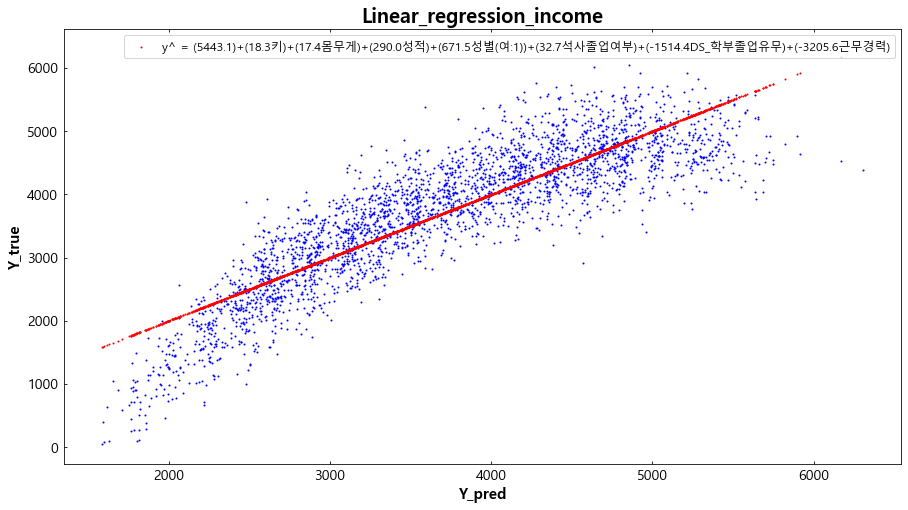

y_predict_mean :  3709.653293212972


In [750]:
y_predict = X.dot(np.array(BETAS).T)
mean_y = np.mean(Y)
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x=y_predict, y=Y, s=1, color='blue')
plt.scatter(x=y_predict, y=y_predict, s=1, color='red', label = linear_func)
#plt.axhline(y=mean_y , color='black', linestyle='--', linewidth=2, label = "mean_y")

plt.title('Linear_regression_income',size=20,weight='bold')
plt.xlabel('Y_pred',weight='bold',color='black',size=15)
plt.ylabel('Y_true',weight='bold',color='black',size=15)
plt.legend(loc = 'upper right',fontsize='large')
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.show()
print('y_predict_mean : ',mean_y)

In [535]:
# sse / sst 로 r2값 구하기 // 위에서 구한 방식은 메트릭스로.. 
y_hat = X.dot(BETAS)
1-np.sum((y_hat-Y.T)**2) / np.sum((Y-np.mean(Y))**2)

0.7620202163704128

# 계수 유의성 검정 

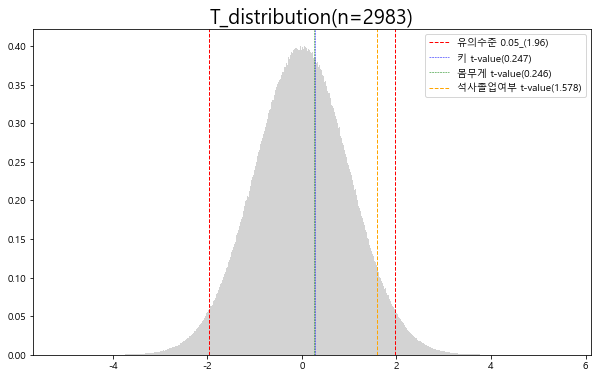

In [709]:
s = np.random.standard_t(2983, size=9000000)
plt.hist(s, bins=1000, density=True,color = 'lightgray')
plt.axvline(x=-1.96 , color='r', linestyle='--', linewidth=1)
plt.axvline(x=1.96 , color='r', linestyle='--', linewidth=1,label = "유의수준 0.05_(1.96)")
plt.axvline(x=0.27 , color='blue', linestyle='--', linewidth=0.5,label = "키 t-value(0.247)")
plt.axvline(x=0.246 , color='green', linestyle='--', linewidth=0.5,label = "몸무게 t-value(0.246)")
plt.axvline(x=1.578 , color='orange', linestyle='--', linewidth=1,label = "석사졸업여부 t-value(1.578)")
plt.legend()
plt.title('T_distribution(n=2983)',size=20) 
plt.show()  # 정규분포와 같다 가정. 

# 유의미한 변수로만 정리 

In [772]:
# 유의미 변수들로만 돌리기 [4개 변수로만 ]
def MLR_MODEL2(X,Y) :
    global MLR_data
    MLR_data = pd.DataFrame(columns = ['Betas','Standard_Error','t_value','p-value']) # ,'0.025','0.975'])
    n = X.shape[0]
    p = X.shape[1]-1   # 독립변수 개수는 7개 --> x.shape는 상수항도 포함되서 8이므로 -1 필요 
# for betas 
    Xt_X = (X.T).dot(X)
    Xt_X_inverse = np.linalg.inv(Xt_X)
    Betas = (Xt_X_inverse.dot(X.T)).dot(Y)
    Betas_list = [float(i) for i in Betas]
    MLR_data['Betas'] = Betas_list
    
# for SSE by using matrix form 
    SSE = (Y.T).dot(Y) - ((Betas.T).dot(X.T)).dot(Y)
    S = float((SSE/(n-p-1))**0.5)
    
# for Cii 
    C_list = []
    a=np.array([[0,0,0,0,0,]]).T
    for i in range(p+1):                                           # 상수항도 계산에 포함 중이니, 레인지 하나더
        
        a[i]=1
        C = ((a.T).dot(Xt_X_inverse)).dot(a)
        C_list.append(*C)
        a[i]=0
        
# for SE
    SE_list =[]
    for i in C_list:
        SE = S*(i**0.5)
        SE_list.append(*SE)
    
    MLR_data['Standard_Error'] = SE_list 
    MLR_data['t_value'] =  MLR_data['Betas']/MLR_data['Standard_Error']
    
# for R2
    y_hat = X.dot(Betas)
    avg_y_hat = np.mean(y_hat)
    SST = np.sum((Y-avg_y_hat)**2)
    R2=float(1-(SSE/SST))
    # sse / sst 로 r2값 구하기 // 위에서 구한 방식은 메트릭스로.. 
    #y_hat = X.dot(BETAS)
    #1-np.sum((y_hat-Y.T)**2) / np.sum((Y-np.mean(Y))**2)
    
# for p-value 
    t_dist = pd.read_excel('T분포표.xlsx').set_index('df (자유도)')
    T_value_p_0025 = t_dist.loc[n-p-1,0.025]
    T_value_p_0975 = t_dist.loc[n-p-1,0.025]
    #MLR_data['0.025'] = MLR_data['Betas']-T_value_p_0025*MLR_data['Standard_Error']
    #MLR_data['0.975'] = MLR_data['Betas']+T_value_p_0975*MLR_data['Standard_Error']
    index_col2  = ['상수', '성적', '성별(여:1)',  'DS_학부졸업유무', '근무경력']
    MLR_data.index = index_col2
    
    return MLR_data,round(R2,3)

In [722]:
# 유의미한 변수들로만 다시 모델링 matrix 
df = normalized_data.copy()
df['beta_0']=1  # 상수항을 위한 ARRAY 생성 

X_result = np.array([df['beta_0'], df['성적'], df['성별(여:1)'], df['DS_학부졸업유무'],df['근무경력']]).T
Y_result = np.array([df['수입']]).T

In [726]:
pd.options.display.float_format = '{:,.3f}'.format
MLR_data2 = MLR_MODEL2(X_result,Y_result)[0]
R22 = MLR_MODEL2(X_result,Y_result)[1]
BETAS2 = MLR_data2['Betas']

In [728]:
MLR_data2.loc['상수','p-value'] = 0.000
MLR_data2.loc['성적','p-value'] = 0.000
MLR_data2.loc['성별(여:1)','p-value'] = 0.000
MLR_data2.loc['DS_학부졸업유무','p-value'] = 0.000
MLR_data2.loc['근무경력','p-value'] = 0.000

In [785]:
print("유의미 변수 추출 후 result\n")
print("R2 : ", R2)
MLR_data2

유의미 변수 추출 후 result

R2 :  0.762


,Betas,Standard_Error,t_value,p-value
상수,"5,460.921",45.201,120.813,0.000
성적,313.050,54.448,5.750,0.000
성별(여:1),669.406,19.327,34.637,0.000
DS_학부졸업유무,"-1,515.607",19.316,-78.463,0.000
근무경력,"-3,204.761",72.728,-44.065,0.000


In [792]:
factors_snes = MLR_data2.loc[['성적','성별(여:1)','DS_학부졸업유무','근무경력'],]

In [793]:
factors_snes 

,Betas,Standard_Error,t_value,p-value
성적,313.050,54.448,5.750,0.000
성별(여:1),669.406,19.327,34.637,0.000
DS_학부졸업유무,"-1,515.607",19.316,-78.463,0.000
근무경력,"-3,204.761",72.728,-44.065,0.000


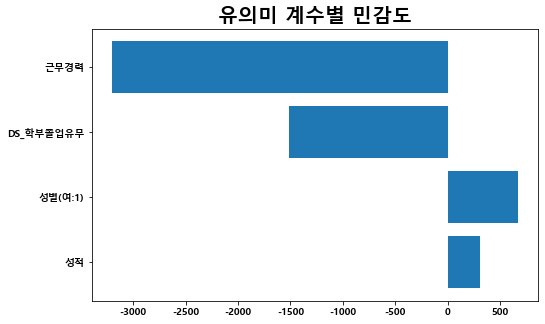

In [797]:
plt.rcParams["figure.figsize"] = (8,5)
factors_snes = MLR_data2.loc[['성적','성별(여:1)','DS_학부졸업유무','근무경력'],]
plt.barh(factors_snes .index,factors_snes ['Betas'])
plt.xticks(rotation=0,weight='bold')
plt.yticks(rotation=0,weight='bold')
plt.title('유의미 계수별 민감도',size=20,weight='bold')
plt.show()

### 유의미 변수로만 회귀식 표현 , 계수 해석

In [753]:
# 회귀식 표현 
columns = [ '','성적', '성별(여:1)',  'DS_학부졸업유무', '근무경력']# '키', '몸무게', '석사졸업여부',
linear_func2 ='y^ = '
n=0
for i in BETAS2 : 
        if n ==0 : 
            linear_func2 = linear_func2 +'('+ str(round(i,1)) + columns[n] + ')'
        else : 
            if i<0 : 
                linear_func2= linear_func2 + '+' + '(' + str(round(i,1)) + columns[n]+ ')'
            else : 
                linear_func2= linear_func2 + '+' + '(' +str(round(i,1)) + columns[n]+ ')'
        n+=1
        
print(linear_func2)

y^ = (5460.9)+(313.1성적)+(669.4성별(여:1))+(-1515.6DS_학부졸업유무)+(-3204.8근무경력)


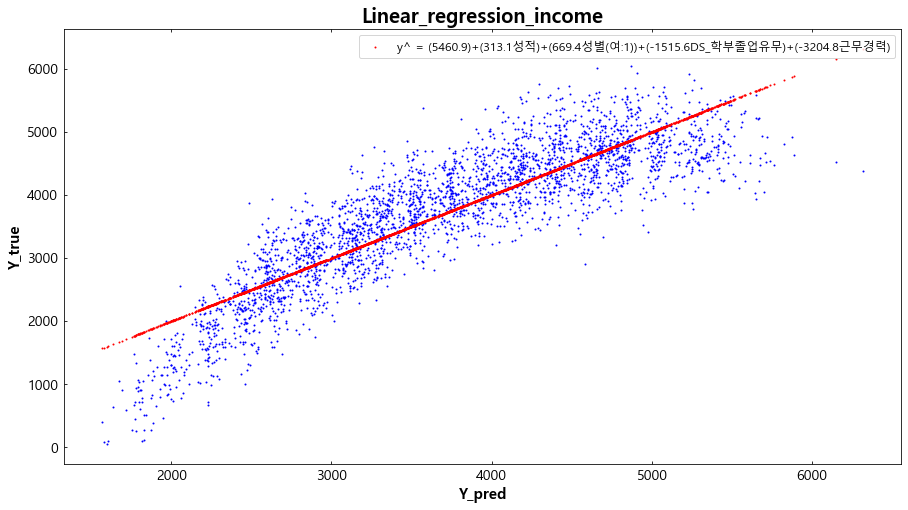

y_predict_mean :  3709.653293212972


In [754]:
y_predict = X_result.dot(np.array(BETAS2).T)
mean_y = np.mean(Y)
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x=y_predict, y=Y_result, s=1, color='blue')
plt.scatter(x=y_predict, y=y_predict, s=1, color='red', label = linear_func2)
#plt.axhline(y=mean_y , color='black', linestyle='--', linewidth=2, label = "mean_y")

plt.title('Linear_regression_income',size=20,weight='bold')
plt.xlabel('Y_pred',weight='bold',color='black',size=15)
plt.ylabel('Y_true',weight='bold',color='black',size=15)
plt.legend(loc = 'upper right',fontsize='large')
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.show()
print('y_predict_mean : ',mean_y)

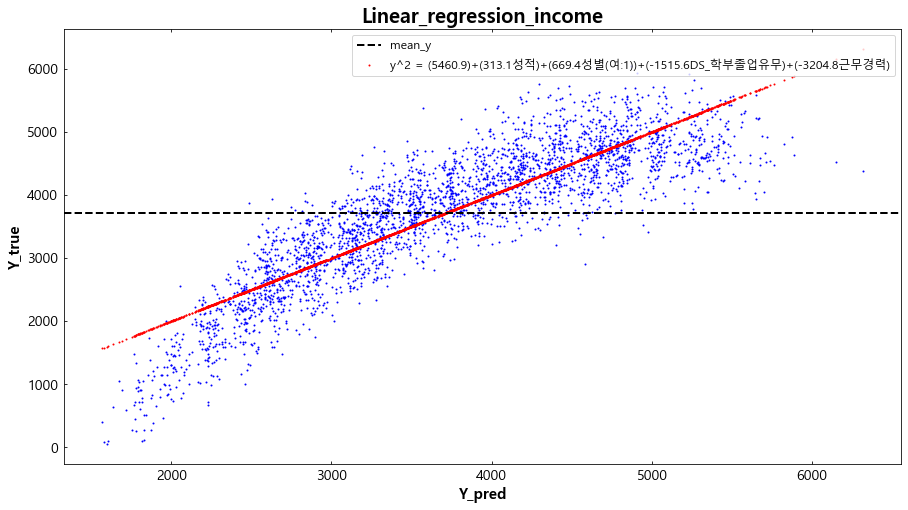

Y_mean :  3709.653293212972


In [798]:
y_predict = X_result.dot(np.array(BETAS2).T)
mean_y = np.mean(Y)
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x=y_predict, y=Y_result, s=1, color='blue')
plt.scatter(x=y_predict, y=y_predict, s=1, color='red', label = linear_func2)
plt.axhline(y=mean_y , color='black', linestyle='--', linewidth=2, label = "mean_y")

plt.title('Linear_regression_income',size=20,weight='bold')
plt.xlabel('Y_pred',weight='bold',color='black',size=15)
plt.ylabel('Y_true',weight='bold',color='black',size=15)
plt.legend(loc = 'upper right',fontsize='large')
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.show()
print('Y_mean : ',mean_y)

# 비정규화 데이터로 모델링  

In [773]:
# matrix 
df2 = data_filt.copy()
df2['beta_0']=1  # 상수항을 위한 ARRAY 생성 
X2 = np.array([df2['beta_0'], df2['성적'], df2['성별(여:1)'], df2['DS_학부졸업유무'],df2['근무경력']]).T
Y2 = np.array([df2['수입']]).T

In [774]:
pd.options.display.float_format = '{:,.3f}'.format
MLR_unorm = MLR_MODEL2(X2,Y2)[0]
R2_unorm = MLR_MODEL2(X2,Y2)[1]
BETAS_unorm = MLR_unorm['Betas']

In [775]:
MLR_unorm.loc['상수','p-value'] = 0.000
MLR_unorm.loc['성적','p-value'] = 0.000
MLR_unorm.loc['성별(여:1)','p-value'] = 0.000
MLR_unorm.loc['DS_학부졸업유무','p-value'] = 0.000
MLR_unorm.loc['근무경력','p-value'] = 0.000

In [799]:
print("유의미 변수 추출 후 result _ 비정규\n")
print("R2 : ", R2_unorm)
MLR_unorm

유의미 변수 추출 후 result _ 비정규

R2 :  0.762


,Betas,Standard_Error,t_value,p-value
상수,"5,679.286",75.218,75.504,0.000
성적,116.348,20.155,5.773,0.000
성별(여:1),669.619,19.313,34.672,0.000
DS_학부졸업유무,"-1,515.479",19.303,-78.511,0.000
근무경력,-213.825,4.844,-44.142,0.000


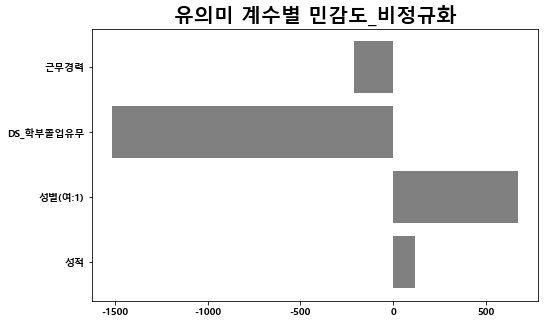

In [816]:
plt.rcParams["figure.figsize"] = (8,5)
factors_snes = MLR_unorm.loc[['성적','성별(여:1)','DS_학부졸업유무','근무경력'],]
plt.barh(factors_snes .index,factors_snes ['Betas'],color='gray')
plt.xticks(rotation=0,weight='bold')
plt.yticks(rotation=0,weight='bold')
plt.title('유의미 계수별 민감도_비정규화',size=20,weight='bold')
plt.show()

In [779]:
columns = [ '', '성적', '성별(여:1)',  'DS_학부졸업유무', '근무경력']#'키', '몸무게','석사졸업여부',
linear_func_unorm ='y^2 = '
n=0
for i in BETAS_unorm : 
        if n ==0 : 
            linear_func_unorm = linear_func_unorm+'('+ str(round(i,1)) + columns[n] + ')'
        else : 
            if i<0 : 
                linear_func_unorm= linear_func_unorm + '+' + '(' + str(round(i,1)) + columns[n]+ ')'
            else : 
                linear_func_unorm= linear_func_unorm + '+' + '(' +str(round(i,1)) + columns[n]+ ')'
        n+=1
        
print(linear_func_unorm)

y^2 = (5679.3)+(116.3성적)+(669.6성별(여:1))+(-1515.5DS_학부졸업유무)+(-213.8근무경력)


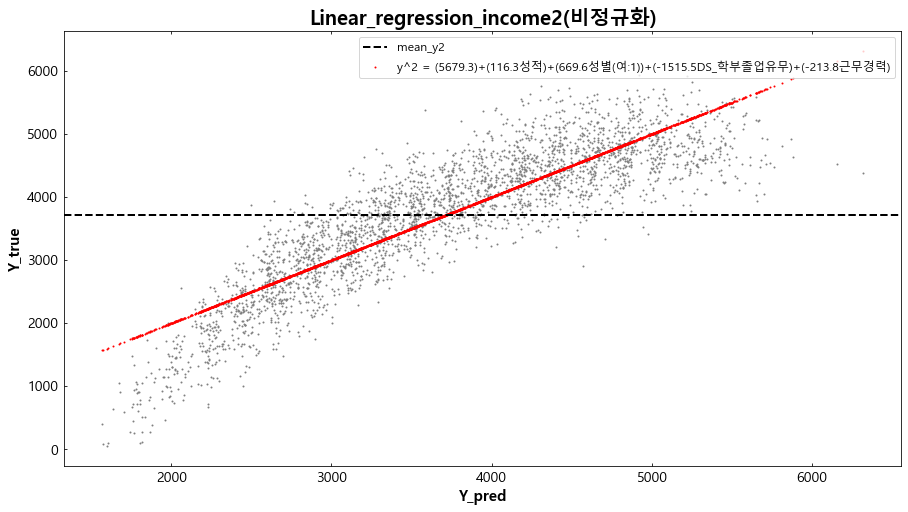

y_predict_mean :  3709.653293212972


In [780]:
y_predict2 = X2.dot(np.array(BETAS_unorm).T)
mean_y2 = np.mean(Y2)
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x=y_predict2, y=Y2, s=1, color='gray')
plt.scatter(x=y_predict2, y=y_predict2, s=1, color='red', label = linear_func_unorm)
plt.axhline(y=mean_y2 , color='black', linestyle='--', linewidth=2, label = "mean_y2")

plt.title('Linear_regression_income2(비정규화)',size=20,weight='bold')
plt.xlabel('Y_pred',weight='bold',color='black',size=15)
plt.ylabel('Y_true',weight='bold',color='black',size=15)
plt.legend(loc = 'upper right',fontsize='large')
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.show()
print('y_predict_mean : ',mean_y2)